In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO("yolov8x-seg.pt")

In [3]:
# Load an image
#image_path = './data/PKLot/PKLot/PUCPR/Rainy/2012-09-16/2012-09-16_07_32_58.jpg'
image_path = './data/PKLot/PKLot/PUCPR/Rainy/2012-10-23/2012-10-23_08_15_50.jpg'
image = cv2.imread(image_path)

In [4]:
# 1: 'bicycle',
# 2: 'car',
# 3: 'motorcycle',
# 4: 'airplane',
# 5: 'bus',
# 6: 'train',
# 7: 'truck',
# Perform inference
results = model(image, conf=0.01, iou=0.6, device='cpu') # [1, 2, 3, 5, 7], augment=True,  conf=0.0001, classes=[2, 6, 7], iou=0.3,
#results[0]


0: 384x640 50 cars, 150 buss, 3 trucks, 632.1ms
Speed: 2.4ms preprocess, 632.1ms inference, 76.6ms postprocess per image at shape (1, 3, 384, 640)


In [5]:
result = results[0]
len(result.boxes)

203

Object type: bus
Coordinates: [729, 410, 764, 477]
Probability: 0.3
---
Object type: bus
Coordinates: [468, 494, 514, 561]
Probability: 0.29
---
Object type: car
Coordinates: [357, 497, 406, 559]
Probability: 0.24
---
Object type: car
Coordinates: [1161, 235, 1202, 275]
Probability: 0.23
---
Object type: bus
Coordinates: [682, 419, 718, 482]
Probability: 0.2
---
Object type: bus
Coordinates: [412, 310, 452, 360]
Probability: 0.19
---
Object type: bus
Coordinates: [695, 264, 728, 310]
Probability: 0.18
---
Object type: bus
Coordinates: [650, 304, 681, 359]
Probability: 0.18
---
Object type: bus
Coordinates: [810, 262, 845, 359]
Probability: 0.17
---
Object type: bus
Coordinates: [488, 308, 524, 365]
Probability: 0.17
---
Object type: bus
Coordinates: [773, 423, 809, 480]
Probability: 0.16
---
Object type: bus
Coordinates: [974, 258, 1012, 316]
Probability: 0.16
---
Object type: bus
Coordinates: [426, 266, 466, 313]
Probability: 0.16
---
Object type: bus
Coordinates: [657, 266, 691, 308]

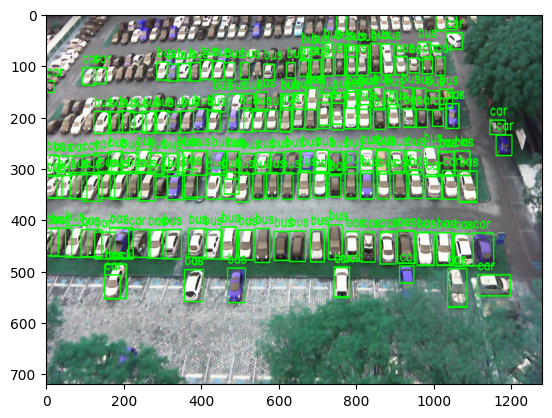

In [6]:
for box in result.boxes:
  class_id = result.names[box.cls[0].item()]
  if class_id == 'car' or class_id == 'truck' or class_id == 'bus':
    cords = box.xyxy[0].tolist()
    cords = [round(x) for x in cords]
    conf = round(box.conf[0].item(), 2)
    print("Object type:", class_id)
    print("Coordinates:", cords)
    print("Probability:", conf)
    print("---")
    
    # Split coordinates
    x1, y1, x2, y2 = cords
    
    # Draw rectangle (bounding box)
    cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    # Put class label on the rectangle
    cv2.putText(image, str(class_id), (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
  
# Save or display the image
plt.imshow(image, aspect='auto')
#cv2.waitKey(0)
#cv2.destroyAllWindows()